In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
plt.style.use("seaborn")

In [3]:
mean_01=np.array([1,0.5])
cov_01=np.array([[1,0.1],[0.1,1.2]])
mean_02=np.array([4,5])
cov_02=np.array([[1.21,0.1],[0.1,1.23]])
data_01=np.random.multivariate_normal(mean_01,cov_01,500)
data_02=np.random.multivariate_normal(mean_02,cov_02,500)

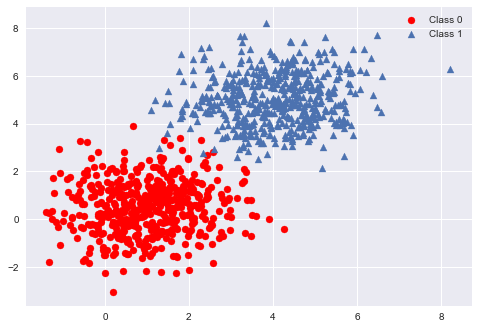

In [4]:
plt.figure(1)
plt.scatter(data_01[:,0],data_01[:,1],color='r',label="Class 0")
plt.scatter(data_02[:,0],data_02[:,1],label="Class 1",marker="^")
plt.legend()
plt.show()

In [5]:
data=np.ones((1000,3))
classes=np.zeros((1000,1))
data[:500,1:]=data_01
data[500:,1:]=data_02
classes[500:,]=1.0

In [6]:
X,Y=shuffle(data,classes,random_state=0)

In [7]:
split=800
X_train,X_test=X[:800,],X[800:,]
Y_train,Y_test=Y[:800,],Y[800:,]
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(800, 3) (800, 1) (200, 3) (200, 1)


In [8]:
def hypothesis(x,theta):
    sigmoid=(1.0/(1.0 + np.exp(-1.0*np.dot(x,theta))))
    return(sigmoid)

def error(X,Y,theta):
    m=X.shape[0]
    err=0
    for i in range(m):
        hx=hypothesis(X[i],theta)
        err+=Y[i]*np.log2(hx) + (1-Y[i])*np.log2(1-hx)
    err /=m
    return(-err)

def gradient(X,Y,theta):
    grad=np.zeros((X.shape[1]))
    m=X.shape[0]
    fea=X.shape[1]
    for i in range(m):
        hx=hypothesis(X[i],theta)
        for j in range(fea):
            grad[j]+=(hx-Y[i])*X[i,j]
    grad=grad/m
    return(grad)

def gradient_ascent(X,Y,learning_rate=0.5):
    theta=2*np.random.random(X.shape[1])
    theta[0]=0
    error_list=[]
    acc_list=[]
    for i in range(100):
        grad=gradient(X,Y,theta)
        err=error(X,Y,theta)
        error_list.append(err)
        acc_list.append(accuracy(X,Y,theta))
        for j in range(X.shape[1]):
            theta[j]-=learning_rate*grad[j]
    return(theta,error_list,acc_list)

def predict(x,theta):
    p=hypothesis(x,theta)
    if p<0.5:
        return 0
    else:
        return 1

def accuracy(X,Y,theta):
    y_pred=[]
    for i in range(X.shape[0]):
        p=predict(X[i],theta)
        y_pred.append(p)
    y_pred=np.array(y_pred)
    y_pred=y_pred.reshape((-1,1))
    return(Y==y_pred).sum()/X.shape[0]



In [9]:
theta,error_list,acc_list=gradient_ascent(X_train,Y_train)

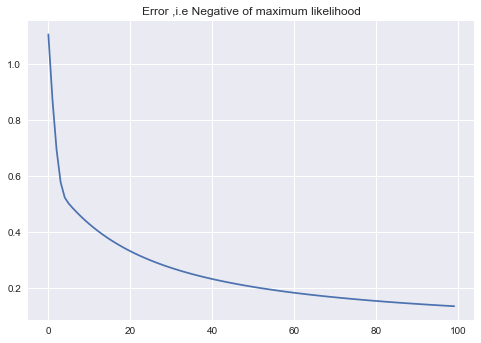

In [10]:
plt.plot(error_list)
plt.title("Error ,i.e Negative of maximum likelihood")
plt.show()

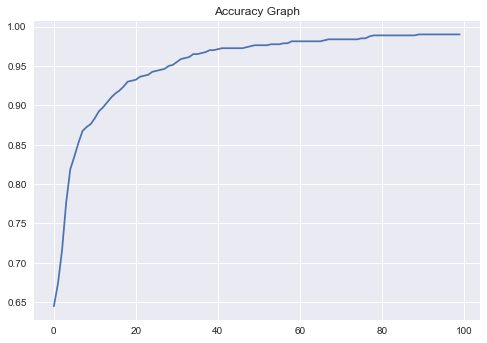

In [11]:
plt.plot(acc_list)
plt.title("Accuracy Graph")
plt.show()
acc=accuracy(X_test,Y_test,theta)

In [135]:
print(acc)

0.97


In [136]:
print(theta)

[-3.68856148  0.42151619  1.14325123]


# Decision Boundary

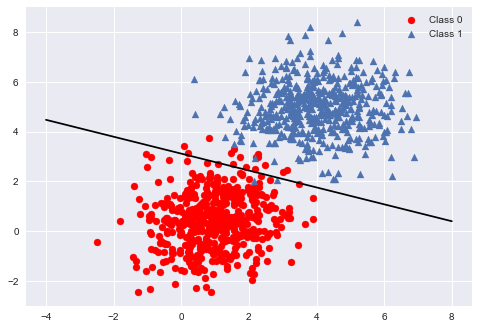

In [124]:
plt.figure(1)
plt.scatter(data_01[:,0],data_01[:,1],color='r',label="Class 0")
plt.scatter(data_02[:,0],data_02[:,1],label="Class 1",marker="^")
x=np.linspace(-4,8,15)
y=-1*(theta[0]+x*theta[1])/theta[2]
plt.plot(x,y,color='black')
plt.legend()
plt.show()